In [2]:
import os
import cv2
from PIL import Image

In [20]:
image = cv2.imread(os.path.join("dataset", "zootopia_images", "frame_10000.jpg"))

In [21]:
image.shape

(808, 1920, 3)

In [22]:
original_height, original_width = image.shape[:2]
desired_size = min([original_height, original_width])

start_x = (original_width - desired_size) // 2
end_x = start_x + desired_size

start_y = (original_height - desired_size) // 2
end_y = start_y + desired_size

In [23]:
# Crop the image
cropped_image = image[start_y:end_y, start_x:end_x]

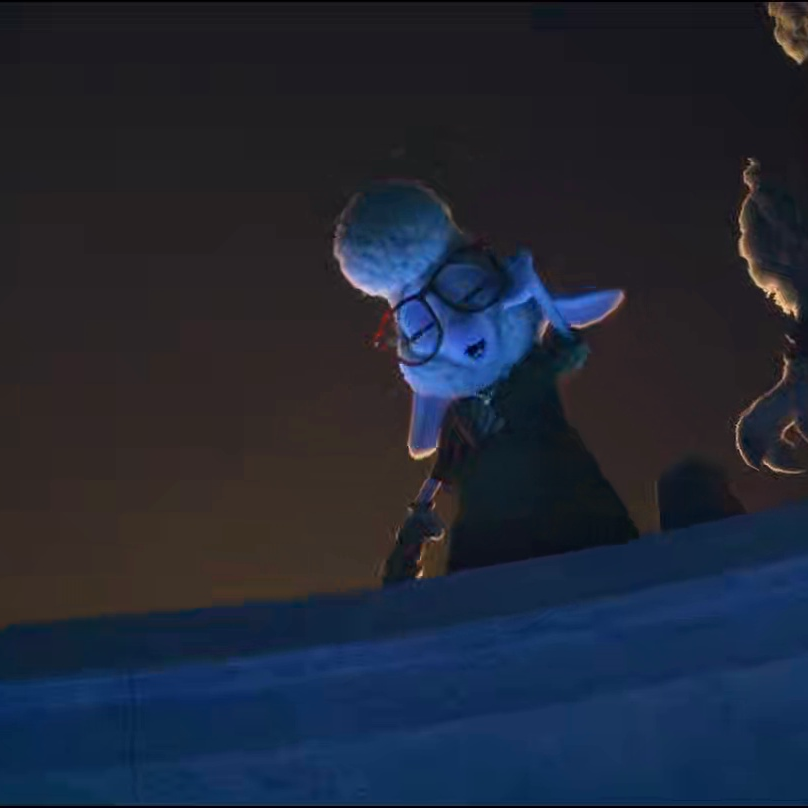

In [24]:
Image.fromarray(cropped_image)

In [ ]:
# Load the image
image = cv2.imread(os.path.join("dataset", "zootopia_images", "frame_0.jpg"))

# Specify the region of the watermark (this needs to be manually set)
# For example, if the watermark is in the bottom right corner:
watermark_region = image[-50:, -200:]  # Adjust these values based on the watermark size and location

# Create a mask for the watermark region
mask = cv2.inRange(watermark_region, np.array([0, 0, 0]), np.array([255, 255, 255]))

# Inpainting to remove the watermark
result = cv2.inpaint(image, mask, 3, cv2.INPAINT_TELEA)

# Save the result
cv2.imwrite('/mnt/data/frame_0_cleaned.jpg', result)

# Display the result
cv2.imshow('Cleaned Image', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [67]:
# Load the video
video_path = os.path.join("dataset", "zootopia.mp4")

# Create save directory if not available
output_path = os.path.join("dataset", "zootopia_images")
os.makedirs(output_path, exist_ok=True)

cap = cv2.VideoCapture(video_path)

In [77]:
# Load the video
video_path = os.path.join("dataset", "zootopia.mp4")

# Create save directory if not available
output_path = os.path.join("dataset", "zootopia_images")
os.makedirs(output_path, exist_ok=True)

cap = cv2.VideoCapture(video_path)

# Define frame rate or interval for frame extraction
frame_rate = 1  # Extract 1 frame per second
current_frame = 0

minutes_to_stop = 4
seconds_to_stop = minutes_to_stop * 60
frame_to_stop = (round(cap.get(cv2.CAP_PROP_FPS)) * seconds_to_stop) + 1

while True:
    # Read a frame
    success, frame = cap.read()

    # If the frame was not successfully read, break the loop
    if not success:
        break

    # Save the frame at specified interval
    # if current_frame % (frame_rate * cap.get(cv2.CAP_PROP_FPS)) == 0:
    #     frame_name = f"frame_{current_frame}.jpg"
    #     cv2.imwrite(os.path.join(output_path, frame_name), frame)

    current_frame += 1
    print(f"Current frame: {current_frame}/{frame_to_stop}", end="\r")
    if frame_to_stop == current_frame:
        break
    

    

# Release the video capture object
cap.release()


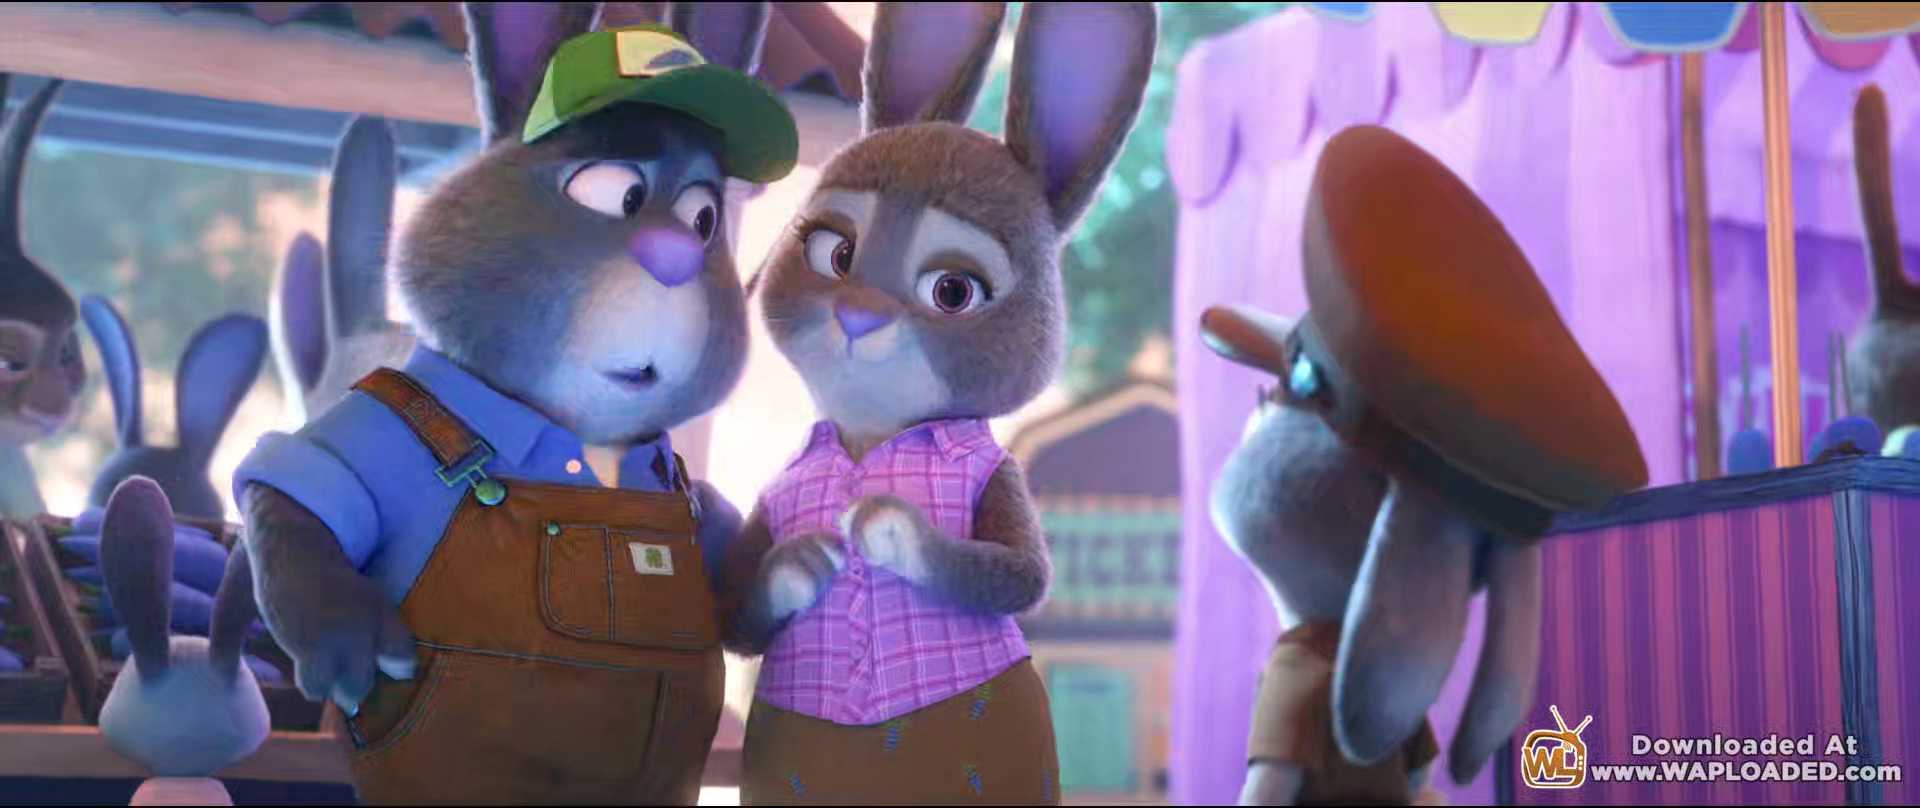

In [78]:
Image.fromarray(frame)